In [117]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pipeline_v100
reload(pipeline_v100)

sns.set_palette("Set2")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [118]:
x_s = np.linspace(0, 5, num=100)
y_s = np.array([pipeline_v100.simulation(n=7, a_x= 1, h_z= x, DEBUG=True) for x in x_s])

trace of rho: (1+0j)
trace of rho + delta: (1-3.782107050168176e-20j)
purity of rho: (0.5865890947840973+0j)
purity of rho + delta: (0.586529260444028+1.0699084915005881e-19j)
rank of rho: 2
rank of rho + delta: 2
trace of rho: (1+6.674146423225292e-19j)
trace of rho + delta: (1.0000000000000004+2.240109420065301e-18j)
purity of rho: (0.585071061403031+3.823294965669098e-19j)
purity of rho + delta: (0.5844157210584227+5.203710515509842e-20j)
rank of rho: 2
rank of rho + delta: 2
trace of rho: (1-1.5686945515142734e-18j)
trace of rho + delta: (0.9999999999999997+3.3191379093947208e-18j)
purity of rho: (0.5806185237380568-9.889043484744952e-19j)
purity of rho + delta: (0.5794115575207546+4.182225177068108e-20j)
rank of rho: 2
rank of rho + delta: 2
trace of rho: (0.9999999999999997+2.018380763860917e-18j)
trace of rho + delta: (1+4.214568878355954e-18j)
purity of rho: (0.5735300518238942+1.2883900523329942e-18j)
purity of rho + delta: (0.5718525782188475-8.455506395966053e-19j)
rank of r

KeyboardInterrupt: 

In [ ]:
y_s[0]

{'trace_rho': (1+0j),
 'trace_rho_delta': (1-3.782107050168176e-20j),
 'purity_rho': (0.5865890947840973+0j),
 'purity_rho_delta': (0.586529260444028+1.0699084915005881e-19j),
 'rank_rho': 2,
 'rank_rho_delta': 2,
 'lower_tqfi': (16548.719794395747+8.068108147915773e-14j),
 'upper_tqfi': 39905.722288322475}

In [106]:
# pipelines return debug info only if we are in DEBUG==True
purity_rho = np.array([np.real(x["purity_rho"]) for x in y_s ])
purity_rho_delta = np.array([np.real(x["purity_rho_delta"]) for x in y_s ])
lower_tqfi = np.array([np.real(x["lower_tqfi"]) for x in y_s ])
upper_tqfi = np.array([np.real(x["upper_tqfi"]) for x in y_s ])

error = np.max([np.imag(x["lower_tqfi"]) for x in y_s ])
print(error)

3.105746320568992e-13


Text(0.5, 0, 'h_z')

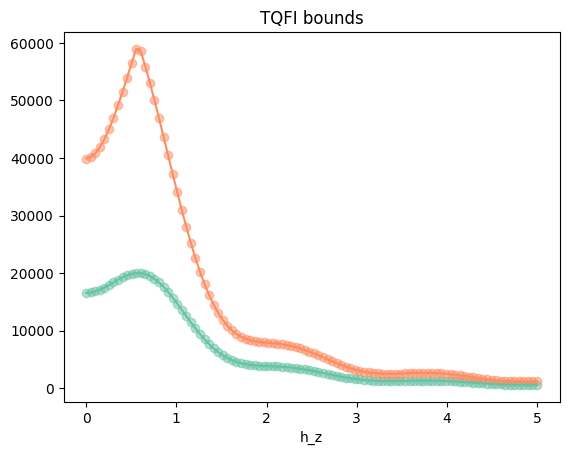

In [107]:
plt.scatter(x_s, lower_tqfi, alpha=0.5)
plt.plot(x_s, lower_tqfi)
plt.scatter(x_s, (upper_tqfi), alpha=0.5)
plt.plot(x_s, (upper_tqfi))
plt.title("TQFI bounds")
plt.xlabel("h_z")

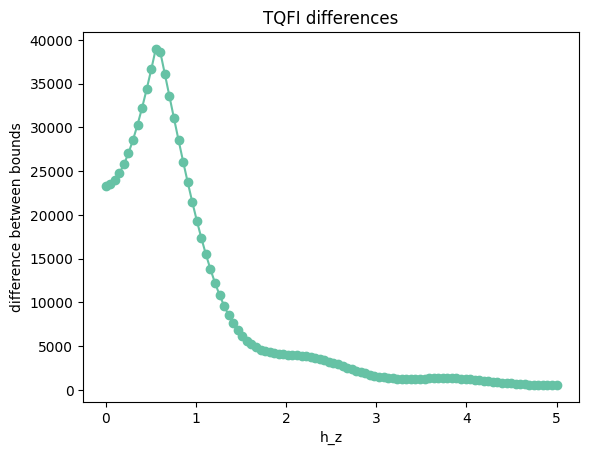

In [108]:
plt.scatter(x_s,upper_tqfi - lower_tqfi)
plt.plot(x_s,upper_tqfi - lower_tqfi)
plt.title("TQFI differences")
plt.ylabel("difference between bounds")
plt.xlabel("h_z")
plt.show()

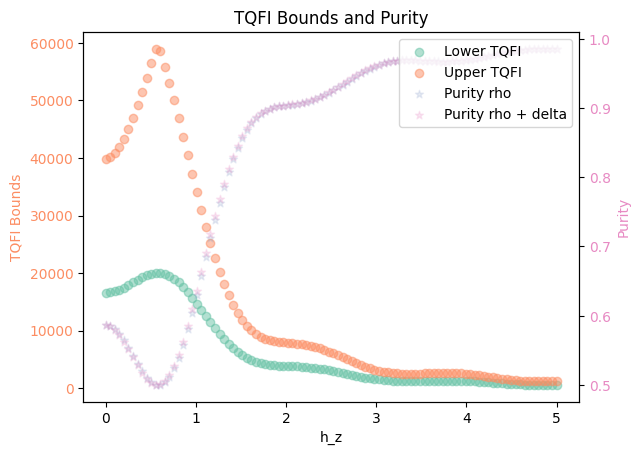

In [116]:
fig, ax1 = plt.subplots()

palette = sns.color_palette("Set2")

# First y-axis
ax1.scatter(x_s, lower_tqfi, alpha=0.5, label="Lower TQFI", color = palette[0])
#ax1.plot(x_s, lower_tqfi)
ax1.scatter(x_s, upper_tqfi, alpha=0.5, label="Upper TQFI", color =  palette[1])
#ax1.plot(x_s, upper_tqfi)

ax1.set_xlabel("h_z")
ax1.set_ylabel("TQFI Bounds", color= palette[1])
ax1.tick_params(axis='y', labelcolor= palette[1])

# Second y-axis
ax2 = ax1.twinx()
ax2.scatter(x_s, purity_rho, alpha=0.2, marker="*",label="Purity rho", 
            color= palette[2])
ax2.scatter(x_s, purity_rho_delta, alpha=0.2, marker="*", label="Purity rho + delta", color = palette[3])

ax2.set_ylabel("Purity", color=palette[3])
ax2.tick_params(axis='y', labelcolor=palette[3])

# Legend
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title("TQFI Bounds and Purity")
plt.show()
